# 1 Import packages

In [1]:
import Ipynb_importer

In [3]:
import TrodesReader
# import from https://bitbucket.org/mkarlsso/trodes/src/master/ or pip install trodesnetwork
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
import emkanalysis_clc_toolkit as ct

importing Jupyter notebook from emkanalysis_clc_toolkit.ipynb


# 2 Load Data and Initial Processing

## 2.1 Load Data

In [4]:
# this is the 40 min data : 20211207_E1_124311 

# Sameera's data path
'''
data_path_28 = 'D:\\Recordings\\20211207_E1_124311.LFP\\20211207_E1_124311.LFP_nt28ch1.dat'
data_path_27 = 'D:\\Recordings\\20211207_E1_124311.LFP\\20211207_E1_124311.LFP_nt27ch1.dat'
data_path_29 = 'D:\\Recordings\\20211207_E1_124311.LFP\\20211207_E1_124311.LFP_nt29ch1.dat'
time_path = 'D:\\Recordings\\20211207_E1_124311.LFP\\20211207_E1_124311.timestamps.dat'
'''

# Jhan's data path
data_path_28 = r"C:\Users\mengz\Box\Jhan\ClosedLoopControl Project\DATA\20211207_E1_124311\20211207_E1_124311.LFP_nt28ch1.dat"
data_path_27 = r"C:\Users\mengz\Box\Jhan\ClosedLoopControl Project\DATA\20211207_E1_124311\20211207_E1_124311.LFP_nt27ch1.dat"
data_path_29 = r"C:\Users\mengz\Box\Jhan\ClosedLoopControl Project\DATA\20211207_E1_124311\20211207_E1_124311.LFP_nt29ch1.dat"
time_path = r"C:\Users\mengz\Box\Jhan\ClosedLoopControl Project\DATA\20211207_E1_124311\20211207_E1_124311.timestamps.dat"

In [5]:
# nTrode used: 28

data_27 = TrodesReader.readTrodesExtractedDataFile(data_path_27)
data_28 = TrodesReader.readTrodesExtractedDataFile(data_path_28)
data_29 = TrodesReader.readTrodesExtractedDataFile(data_path_29)
time = TrodesReader.readTrodesExtractedDataFile(time_path)

<string>:69: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.


In [6]:
data_27 = data_27['data']
data_28 = data_28['data']
data_29 = data_29['data']

In [7]:
print(data_27[1:10])
print(data_28[1:10])
print(data_29[1:10])

[(246,) (446,) (554,) (596,) (609,) (612,) (635,) (696,) (760,)]
[(-245,) (-495,) (-667,) (-746,) (-820,) (-840,) (-739,) (-625,) (-591,)]
[(-375,) (-698,) (-841,) (-871,) (-869,) (-854,) (-836,) (-829,) (-806,)]


## 2.2 Convert time frame

In [8]:
time_data = ct.convert_time(time)

## 2.3 Parameters and Filtering

In [9]:
lfp_sampling_rate = 1500
lfp_sampling_period = (1/lfp_sampling_rate)*(10**9)

sw_lower = 5
sw_upper = 15
ripple_lower = 150
ripple_upper = 250

offline_hilbert_numstd = 9
noise_numstd = 5
offline_rms_numstd = 3
online_rms_numstd = 3

In [10]:
lfp_data_channelavg = []
for i in range(len(data_27)):
    lfp_data_channelavg.append((data_27[i][0]+data_28[i][0]+data_29[i][0])/3)

C:\Users\mengz\AppData\Local\Temp/ipykernel_17696/3777176557.py:3: RuntimeWarning: overflow encountered in short_scalars
  lfp_data_channelavg.append((data_27[i][0]+data_28[i][0]+data_29[i][0])/3)


In [11]:
lfp_data_28 = []
for i in data_28:
    lfp_data_28.append(i[0])

<IPython.core.display.Javascript object>


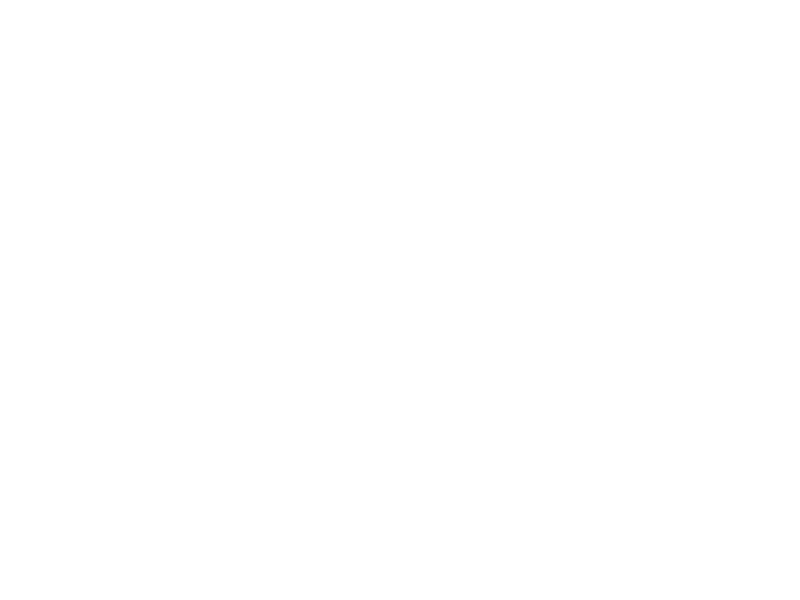

In [12]:
%matplotlib notebook
plt.figure()
plt.plot(time_data,lfp_data_28,color='r')
plt.plot(time_data,lfp_data_channelavg,color='k')

In [13]:
ripple_lfp_data_28 = ct.bandpass_filter('butterworth', lfp_data_28, lfp_sampling_rate, 1, ripple_lower, ripple_upper)
noise_data_28 = ct.bandpass_filter('butterworth', lfp_data_28, lfp_sampling_rate, 1, 500, 600)

ripple_lfp_data_channelavg = ct.bandpass_filter('butterworth', lfp_data_channelavg, lfp_sampling_rate, 1,\
                                                ripple_lower, ripple_upper)
noise_data_channelavg = ct.bandpass_filter('butterworth', lfp_data_channelavg, lfp_sampling_rate, 1, 500, 600)

# 3 Offline&Noise Processing with Hilbert

## 3.1 Hilbert Transform

In [14]:
offline_hilbert_magnitude_28 = ct.hilbert_processing(ripple_lfp_data_28)
noise_hilbert_magnitude_28 = ct.hilbert_processing(noise_data_28)

In [15]:
offline_hilbert_magnitude_channelavg = ct.hilbert_processing(ripple_lfp_data_channelavg)
noise_hilbert_magnitude_channelavg = ct.hilbert_processing(noise_data_channelavg)

<IPython.core.display.Javascript object>


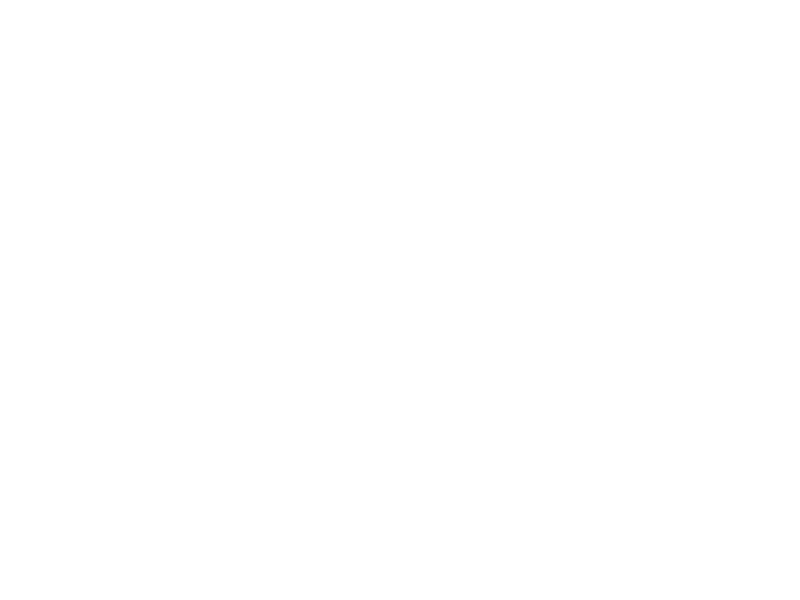

In [16]:
# Data from channel 28
#Ripple-range data, Noise-range data against Raw Data (with Hilbert)
%matplotlib notebook
plt.figure()
plt.plot(time_data,lfp_data_28,color='k',label='Raw Data')
plt.plot(time_data,offline_hilbert_magnitude_28,color='b',label='Ripple Range Hilbert')
plt.plot(time_data,noise_hilbert_magnitude_28,color='r',label='Noise Range Hilbert')
plt.show()

<IPython.core.display.Javascript object>


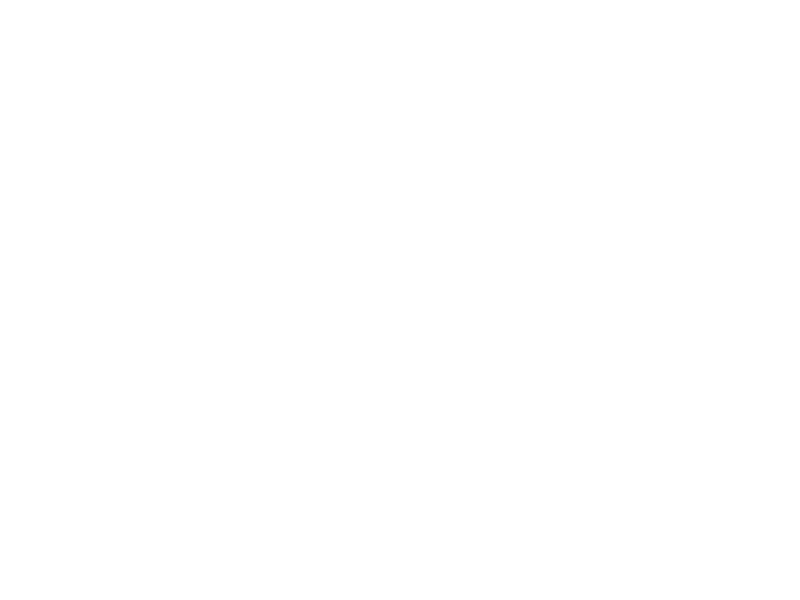

In [17]:
# Data averaged across three channels
#Ripple-range data, Noise-range data against Raw Data (with Hilbert)
%matplotlib notebook
plt.figure()
plt.plot(time_data,lfp_data_channelavg,color='k',label='Raw Data')
plt.plot(time_data,offline_hilbert_magnitude_channelavg,color='b',label='Ripple Range Hilbert')
plt.plot(time_data,noise_hilbert_magnitude_channelavg,color='r',label='Noise Range Hilbert')
plt.show()

## 3.2 Noise Events Detection

In [18]:
noise_hilbert_decarr_28 = ct.detect(noise_hilbert_magnitude_28, noise_numstd, 1)

In [19]:
noise_hilbert_decarr_channelavg = ct.detect(noise_hilbert_magnitude_channelavg, noise_numstd, 1)

## 3.3 Offline(Hilbert) Denoising

In [20]:
offline_hilbert_denoised_results_28 = ct.denoise(offline_hilbert_magnitude_28, time_data, noise_hilbert_decarr_28, 1000)
offline_hilbert_denoised_28 = offline_hilbert_denoised_results_28[0]
offline_hilbert_time_28 = offline_hilbert_denoised_results_28[1]

In [21]:
offline_hilbert_denoised_results_channelavg = ct.denoise(offline_hilbert_magnitude_channelavg, time_data,\
                                                         noise_hilbert_decarr_28, 1000)
offline_hilbert_denoised_channelavg = offline_hilbert_denoised_results_channelavg[0]
offline_hilbert_time_channelavg = offline_hilbert_denoised_results_channelavg[1]

## 3.4 Offline(Hilbert) Detection

### 3.4.1 Detect with Denoised Offline(Hilbert) Data

In [22]:
offline_hilbert_stimarr_28 = ct.detect(offline_hilbert_denoised_28, offline_hilbert_numstd, 3)

In [23]:
offline_hilbert_stimarr_channelavg = ct.detect(offline_hilbert_denoised_channelavg, offline_hilbert_numstd, 3)

<IPython.core.display.Javascript object>


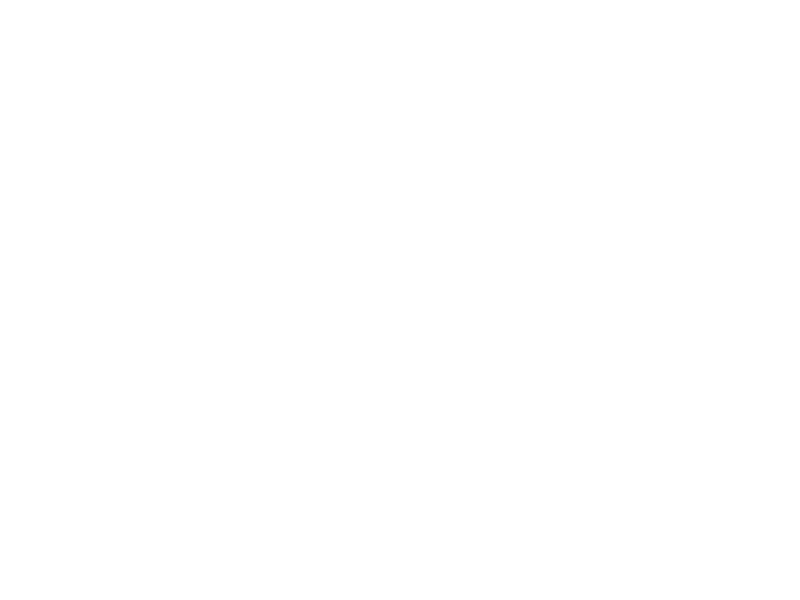

In [24]:
# Data from channel 28
%matplotlib notebook
plt.figure()
plt.plot(time_data,lfp_data_28,label='Raw Data')
plt.plot(offline_hilbert_time_28,offline_hilbert_stimarr_28*3000,color='r',label='Offline(Hilbert) Decision')
plt.show()

<IPython.core.display.Javascript object>


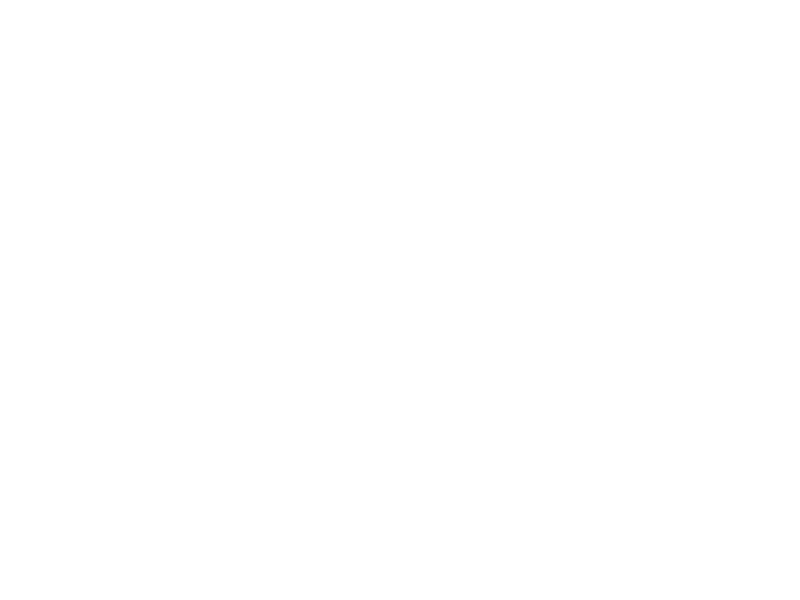

In [25]:
#Data from three channels averaged
%matplotlib notebook
plt.figure()
plt.plot(time_data,lfp_data_channelavg,label='Raw Data')
plt.plot(offline_hilbert_time_channelavg,offline_hilbert_stimarr_channelavg*3000,\
         color='r',label='Offline(Hilbert) Decision')
plt.show()

### 3.4.2 Detect with Offline(Hilbert) Data (no denoising)

In [26]:
offline_hilbert_stimarr_28_raw = ct.detect(offline_hilbert_magnitude_28, offline_hilbert_numstd, 3)

In [27]:
offline_hilbert_stimarr_channelavg_raw = ct.detect(offline_hilbert_magnitude_channelavg,\
                                                   offline_hilbert_numstd, 3)

<IPython.core.display.Javascript object>


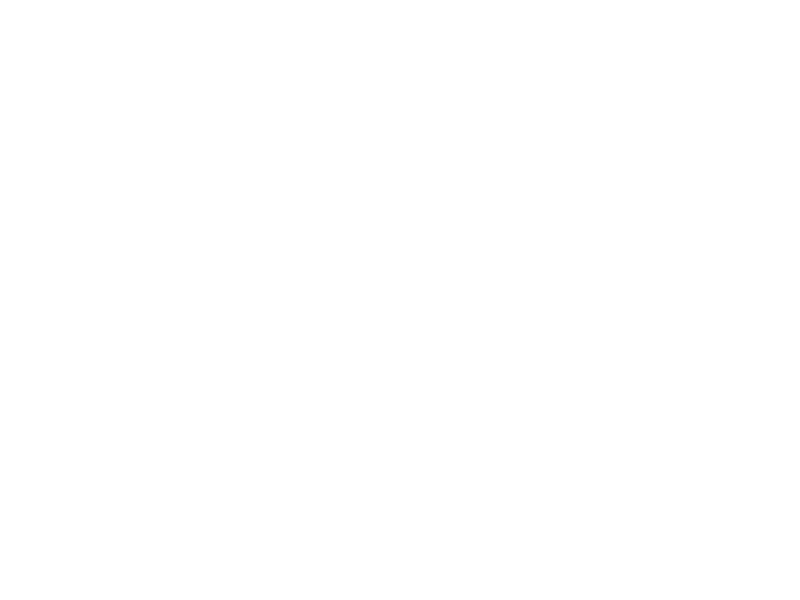

In [28]:
%matplotlib notebook
plt.figure()
plt.plot(time_data,lfp_data_28,label='Raw Data')
plt.plot(time_data,offline_hilbert_stimarr_28_raw*3000,color='r',label='Offline(Hilbert) Decision')
plt.show()

<IPython.core.display.Javascript object>


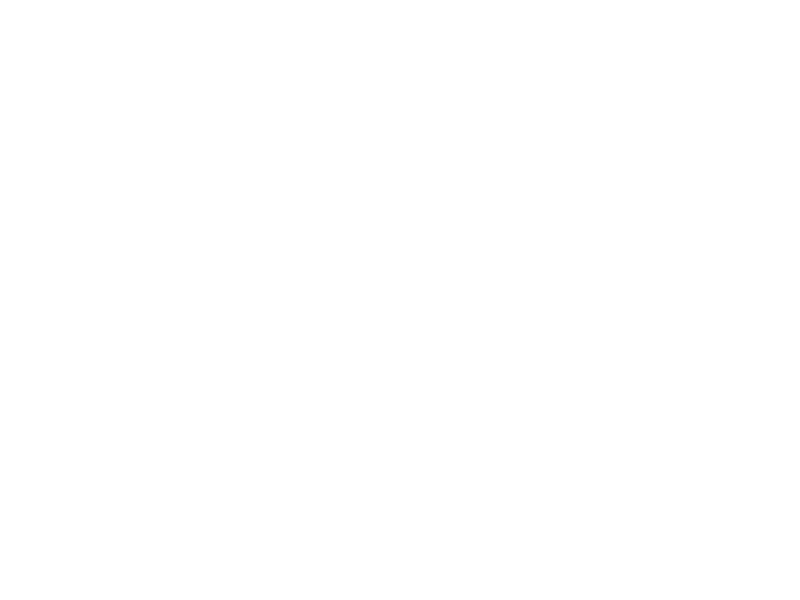

In [29]:
%matplotlib notebook
plt.figure()
plt.plot(time_data,lfp_data_channelavg,label='Raw Data')
plt.plot(time_data,offline_hilbert_stimarr_channelavg_raw*3000,color='r',label='Offline(Hilbert) Decision')
plt.show()

## 3.5 Offline(Hilbert) Deblipping

### 3.5.1 Deblipping denoised Offline(Hilbert) data

In [30]:
hilbert_events_results_28 = ct.extract_events(offline_hilbert_stimarr_28,offline_hilbert_time_28)
offline_hilbert_changedtime_28 = hilbert_events_results_28[0]
offline_hilbert_eventduration_28 = hilbert_events_results_28[1]
offline_hilbert_truetime_28 = hilbert_events_results_28[2]

In [31]:
hilbert_events_results_channelavg = ct.extract_events(offline_hilbert_stimarr_channelavg,offline_hilbert_time_channelavg)
offline_hilbert_changedtime_channelavg = hilbert_events_results_channelavg[0]
offline_hilbert_eventduration_channelavg = hilbert_events_results_channelavg[1]
offline_hilbert_truetime_channelavg = hilbert_events_results_channelavg[2]

In [32]:
offline_hilbert_deblipped_28 = ct.deblip_with_frequency(offline_hilbert_truetime_28,0.1)

In [33]:
offline_hilbert_deblipped_channelavg = ct.deblip_with_frequency(offline_hilbert_truetime_channelavg,0.1)

<IPython.core.display.Javascript object>


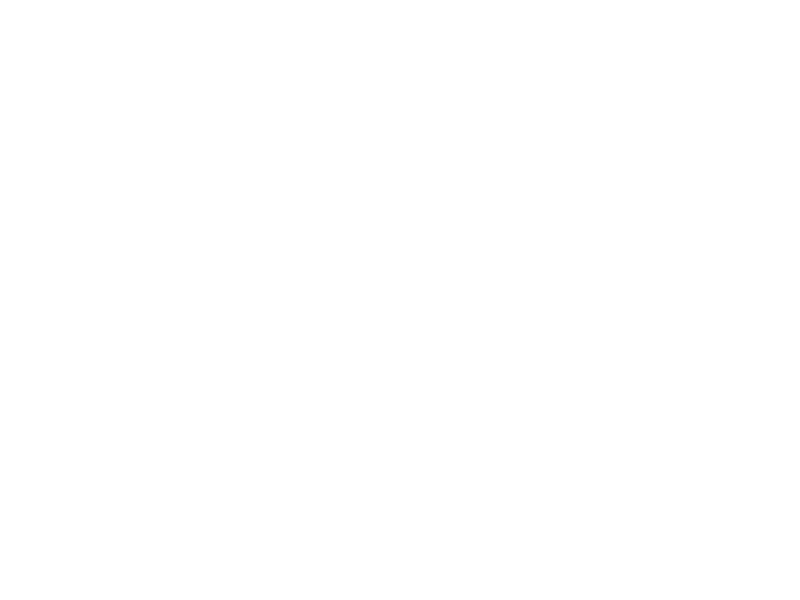

In [34]:
# Data from channel 28
diffbar_hilbert_28, bin_edges_hilbert_28 = np.histogram(offline_hilbert_eventduration_28, range(-50,200))
plt.figure()
plt.bar(bin_edges_hilbert_28[:-1],diffbar_hilbert_28)
plt.show()

<IPython.core.display.Javascript object>


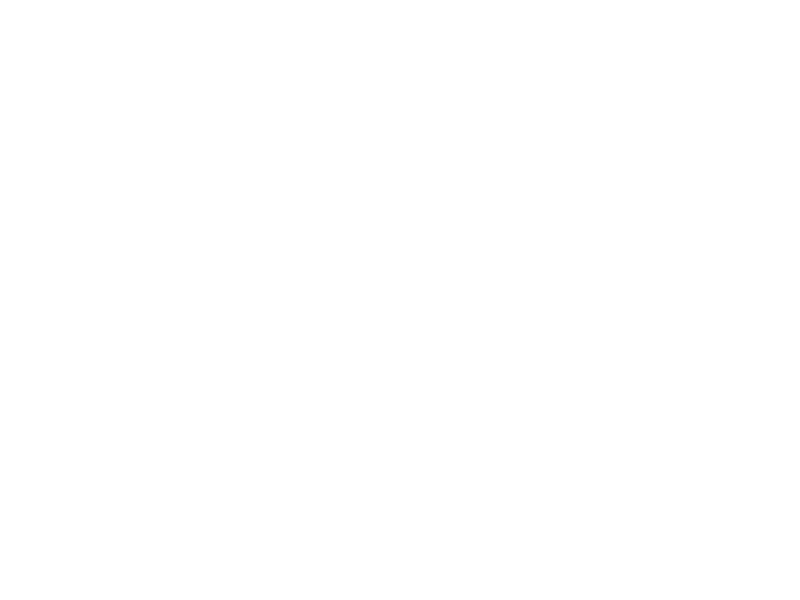

In [35]:
# Data from three channels averaged
diffbar_hilbert_channelavg, bin_edges_hilbert_channelavg = np.histogram(offline_hilbert_eventduration_channelavg,\
                                                                        range(-50,200))
plt.figure()
plt.bar(bin_edges_hilbert_channelavg[:-1],diffbar_hilbert_channelavg)
plt.show()

<IPython.core.display.Javascript object>


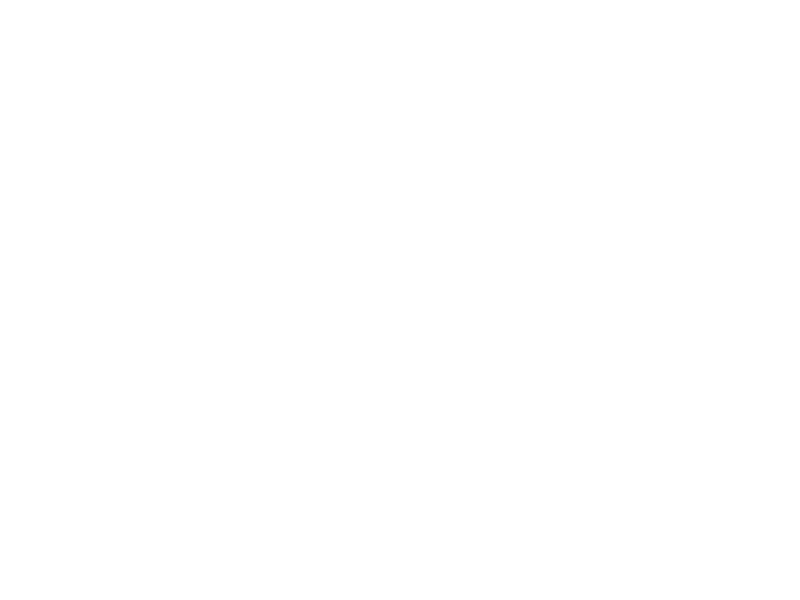

In [36]:
# Results with data from channel 28
%matplotlib notebook
plt.figure()
plt.plot(time_data,lfp_data_28,color='k')
#plt.plot(time_data,ripple_lfp_data,color='b')
plt.scatter(offline_hilbert_deblipped_28,np.array([True]*len(offline_hilbert_deblipped_28))*5000,color='r')
plt.show()

<IPython.core.display.Javascript object>


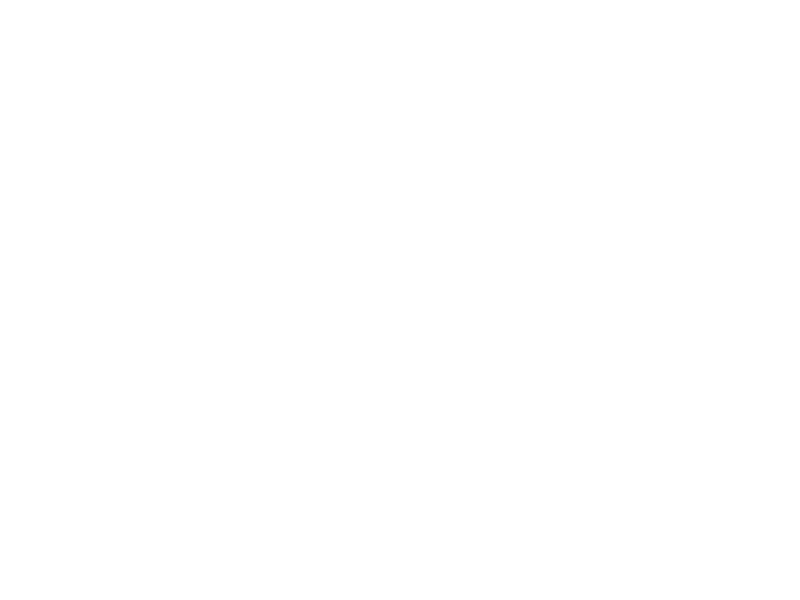

In [37]:
# Results with data from three channels averaged
%matplotlib notebook
plt.figure()
plt.plot(time_data,lfp_data_channelavg,color='k')
#plt.plot(time_data,ripple_lfp_data,color='b')
plt.scatter(offline_hilbert_deblipped_channelavg,np.array([True]*len(offline_hilbert_deblipped_channelavg))*5000,color='r')
plt.show()

### 3.5.2 Deblipping Offline(Hilbert) data (no denoising)

In [38]:
hilbert_events_results_28_raw = ct.extract_events(offline_hilbert_stimarr_28_raw,time_data)
offline_hilbert_changedtime_28_raw = hilbert_events_results_28_raw[0]
offline_hilbert_eventduration_28_raw = hilbert_events_results_28_raw[1]
offline_hilbert_truetime_28_raw = hilbert_events_results_28_raw[2]

In [39]:
offline_hilbert_deblipped_28_raw = ct.deblip_with_frequency(offline_hilbert_truetime_28_raw,0.1)

<IPython.core.display.Javascript object>


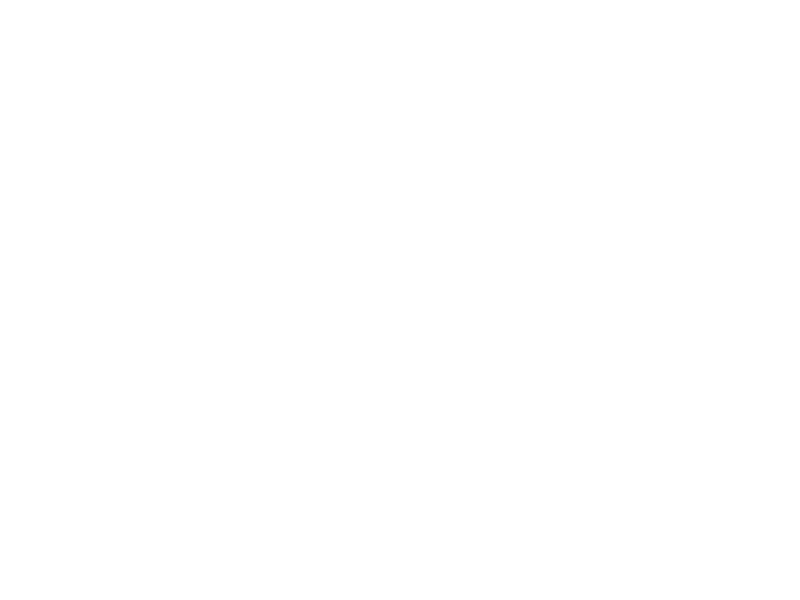

In [40]:
diffbar_28_raw, bin_edges_28_raw = np.histogram(offline_hilbert_eventduration_28_raw, range(-50,150))
plt.figure()
plt.bar(bin_edges_28_raw[:-1],diffbar_28_raw)
plt.show()

<IPython.core.display.Javascript object>


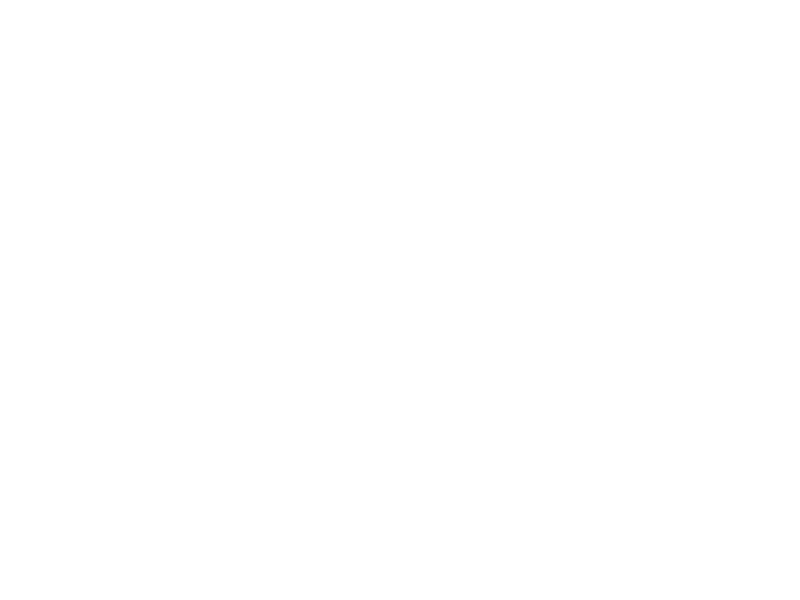

In [41]:
%matplotlib notebook
plt.figure()
plt.plot(time_data,lfp_data_28,color='k')
#plt.plot(time_data,ripple_lfp_data,color='b')
plt.scatter(offline_hilbert_deblipped_28_raw,np.array([True]*len(offline_hilbert_deblipped_28_raw))*5000,color='r')
plt.show()

# 4 Offline Processing with RMS

## 4.1 Offline RMS Processing

In [42]:
offline_rms_processing_results_28 = ct.offline_rms_processing(ripple_lfp_data_28, time_data, 150, 300)
offline_rms_magnitude_28 = offline_rms_processing_results_28[0]
offline_rms_time_28 = offline_rms_processing_results_28[1]

In [43]:
offline_rms_processing_results_channelavg = ct.offline_rms_processing(ripple_lfp_data_channelavg, time_data, 150, 300)
offline_rms_magnitude_channelavg = offline_rms_processing_results_channelavg[0]
offline_rms_time_channelavg = offline_rms_processing_results_channelavg[1]

<IPython.core.display.Javascript object>


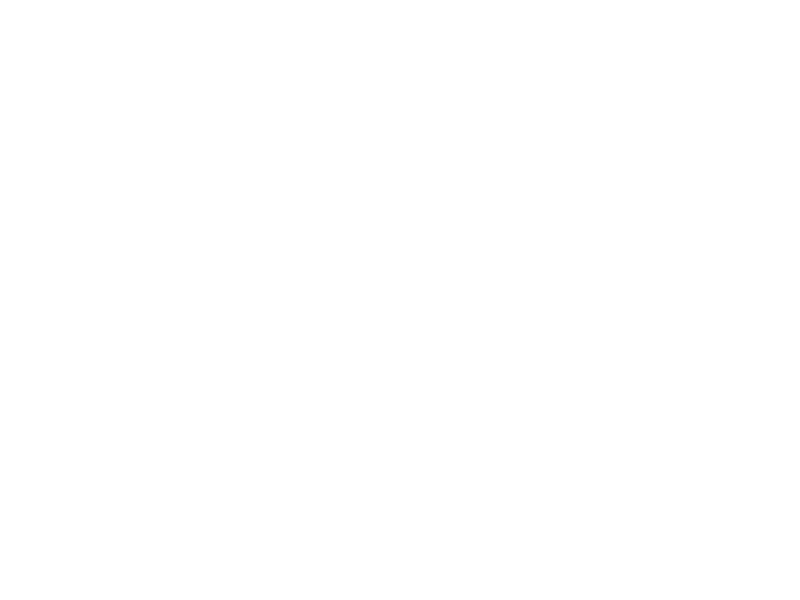

In [44]:
# Data from channel 28
plt.figure()
plt.plot(time_data,lfp_data_28,color='k')
plt.plot(offline_rms_time_28,offline_rms_magnitude_28,color='b')

<IPython.core.display.Javascript object>


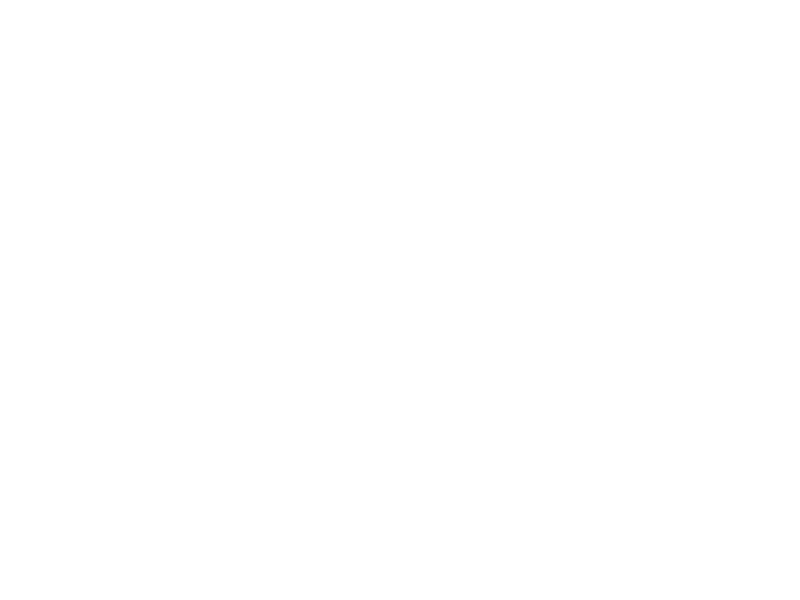

In [45]:
# Data from three channels averaged
plt.figure()
plt.plot(time_data,lfp_data_channelavg,color='k')
plt.plot(offline_rms_time_channelavg,offline_rms_magnitude_channelavg,color='b')

## 4.2 Offline(RMS) Detection

In [46]:
offline_rms_stimarr_28 = ct.detect(offline_rms_magnitude_28, offline_rms_numstd, 3)

In [47]:
offline_rms_stimarr_channelavg = ct.detect(offline_rms_magnitude_channelavg, offline_rms_numstd, 3)

<IPython.core.display.Javascript object>


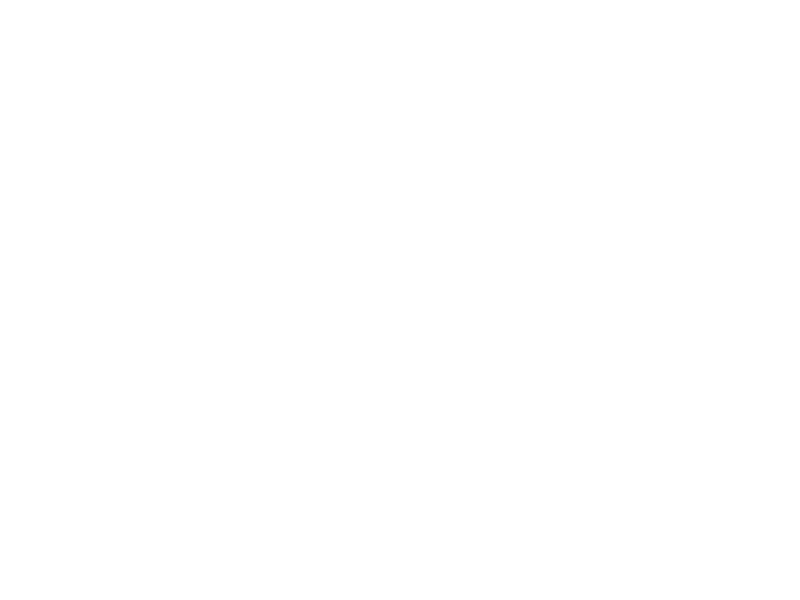

In [48]:
# Data from channel 28
%matplotlib notebook
plt.figure()
plt.plot(time_data,lfp_data_28,color='b')
plt.plot(offline_rms_time_28,offline_rms_stimarr_28*6000,color='r',alpha=0.8)
plt.show()

<IPython.core.display.Javascript object>


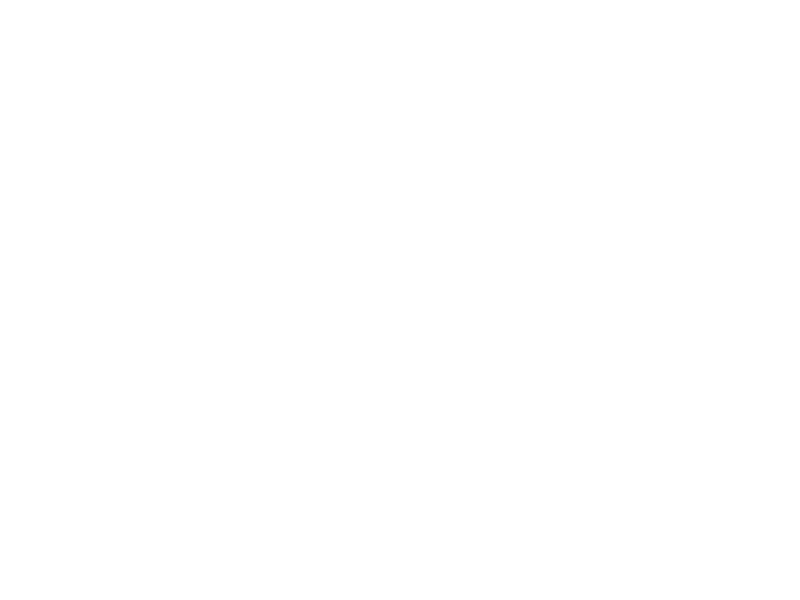

In [49]:
# Data from three channels averaged
%matplotlib notebook
plt.figure()
plt.plot(time_data,lfp_data_channelavg,color='b')
plt.plot(offline_rms_time_channelavg,offline_rms_stimarr_channelavg*3000,color='r',alpha=0.8)
plt.show()

## 4.3 Offline(RMS) Deblipping

In [50]:
offline_rms_events_results_28 = ct.extract_events(offline_rms_stimarr_28,offline_rms_time_28)
offline_rms_changedtime_28 = offline_rms_events_results_28[0]
offline_rms_eventduration_28 = offline_rms_events_results_28[1]
offline_rms_truetime_28 = offline_rms_events_results_28[2]

In [51]:
offline_rms_events_results_channelavg = ct.extract_events(offline_rms_stimarr_channelavg,offline_rms_time_channelavg)
offline_rms_changedtime_channelavg = offline_rms_events_results_channelavg[0]
offline_rms_eventduration_channelavg = offline_rms_events_results_channelavg[1]
offline_rms_truetime_channelavg = offline_rms_events_results_channelavg[2]

In [52]:
offline_rms_deblipped_28 = ct.deblip_with_duration(offline_rms_truetime_28,offline_rms_eventduration_28,100)

In [53]:
offline_rms_deblipped_channelavg = ct.deblip_with_duration(offline_rms_truetime_channelavg,\
                                                           offline_rms_eventduration_channelavg,100)

<IPython.core.display.Javascript object>


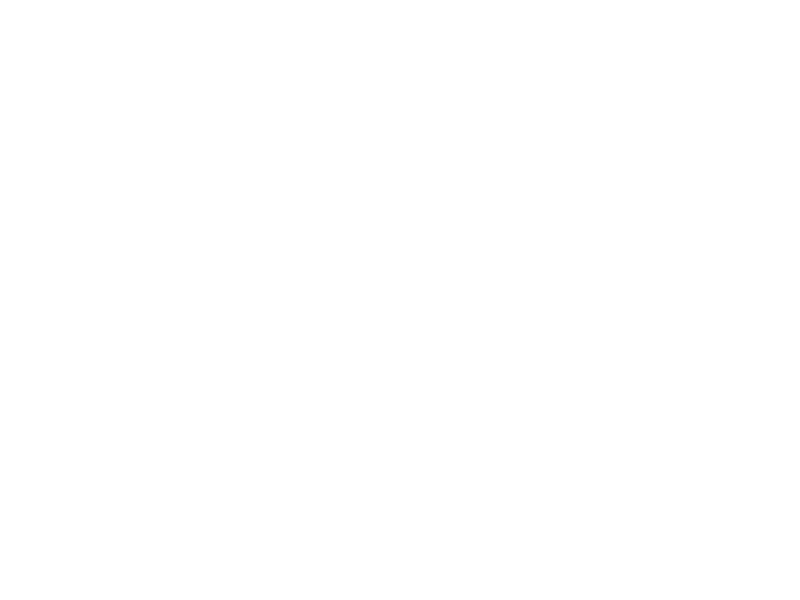

In [54]:
diffbar_rms_28, bin_edges_rms_28 = np.histogram(offline_rms_eventduration_28, range(-20,210))
plt.figure()
plt.bar(bin_edges_rms_28[:-1],diffbar_rms_28)
plt.show()

<IPython.core.display.Javascript object>


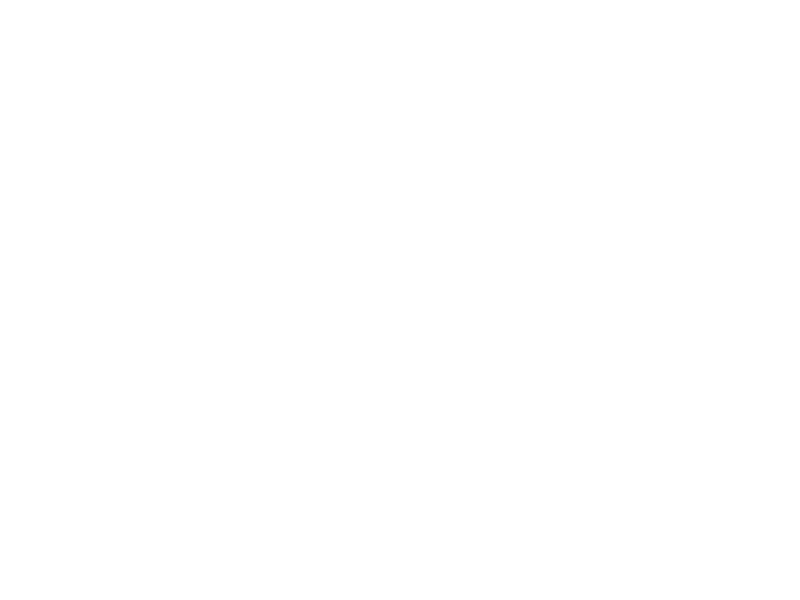

In [55]:
diffbar_rms_channelavg, bin_edges_rms_channelavg = np.histogram(offline_rms_eventduration_channelavg, range(-20,210))
plt.figure()
plt.bar(bin_edges_rms_channelavg[:-1],diffbar_rms_channelavg)
plt.show()

<IPython.core.display.Javascript object>


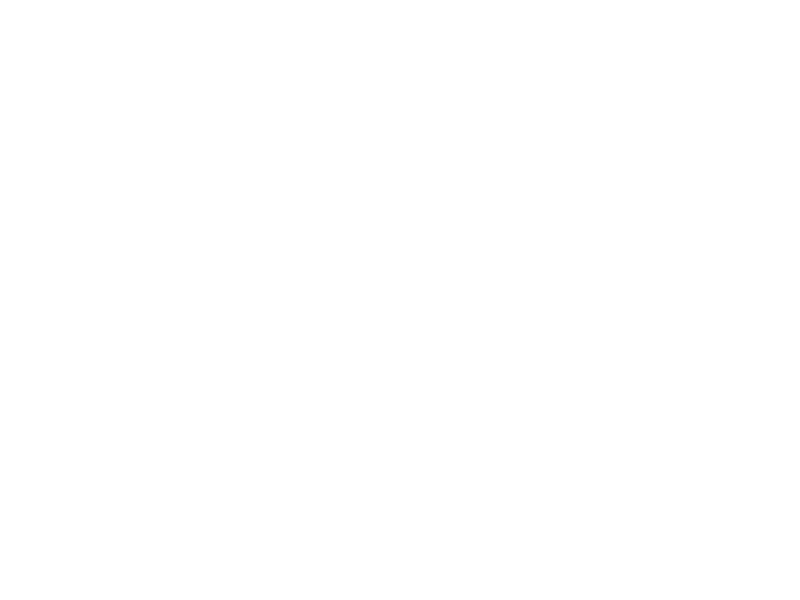

In [56]:
%matplotlib notebook
plt.figure()
plt.plot(time_data,lfp_data_28,color='k')
#plt.plot(time_data,ripple_lfp_data,color='b')
plt.scatter(offline_rms_deblipped_28,np.array([True]*len(offline_rms_deblipped_28))*5000,color='r')
plt.show()

<IPython.core.display.Javascript object>


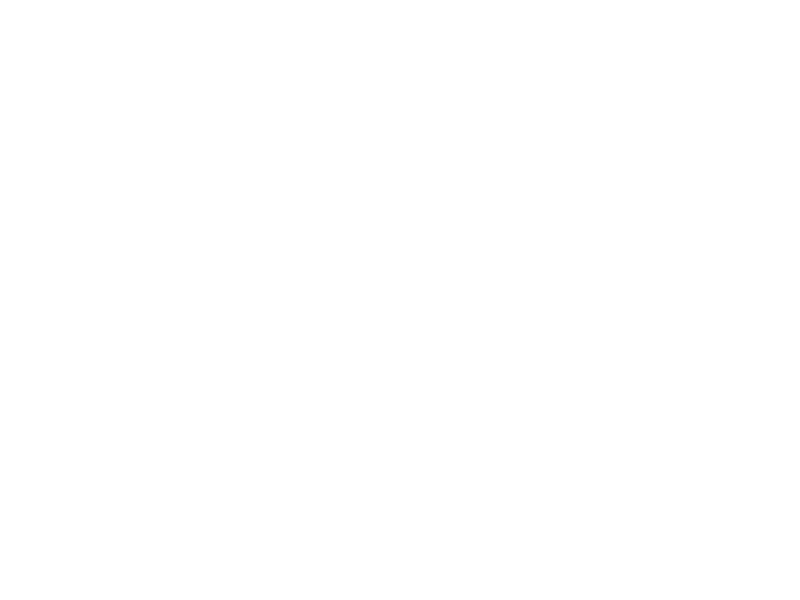

In [57]:
%matplotlib notebook
plt.figure()
plt.plot(time_data,lfp_data_channelavg,color='k')
#plt.plot(time_data,ripple_lfp_data,color='b')
plt.scatter(offline_rms_deblipped_channelavg,np.array([True]*len(offline_rms_deblipped_channelavg))*5000,color='r')
plt.show()

# 5 Online RMS Processing

## 5.1 Online RMS Processing

In [58]:
online_rms_results_28 = ct.online_rms_processing(lfp_data_28, 1500, time_data,\
                                              150, ripple_lower, ripple_upper, 300)
online_rms_magnitude_28 = online_rms_results_28[0]
online_rms_time_28 = online_rms_results_28[1]

In [59]:
online_rms_results_channelavg = ct.online_rms_processing(lfp_data_channelavg, 1500, time_data,\
                                              150, ripple_lower, ripple_upper, 300)
online_rms_magnitude_channelavg = online_rms_results_channelavg[0]
online_rms_time_channelavg = online_rms_results_channelavg[1]

## 5.2 Online RMS Detection

In [60]:
online_rms_stimarr_28 = ct.detect(online_rms_magnitude_28, online_rms_numstd, 3)

In [61]:
online_rms_stimarr_channelavg = ct.detect(online_rms_magnitude_channelavg, online_rms_numstd, 3)

<IPython.core.display.Javascript object>


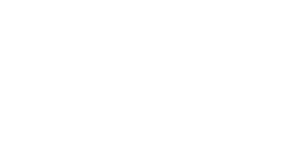

In [62]:
# Data from channel 28
%matplotlib notebook
plt.figure()
plt.plot(time_data,lfp_data_28)
plt.plot(online_rms_time_28,online_rms_stimarr_28*6000,color='r',alpha=0.8)
plt.show()

<IPython.core.display.Javascript object>


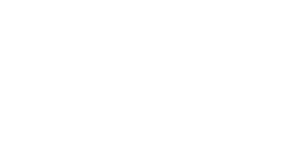

In [63]:
# Data from three channels averaged
%matplotlib notebook
plt.figure()
plt.plot(time_data,lfp_data_channelavg)
plt.plot(online_rms_time_channelavg,online_rms_stimarr_channelavg*3000,color='r',alpha=0.8)
plt.show()

## 5.3 Online RMS Deblipping

In [64]:
online_rms_events_results_28 = ct.extract_events(online_rms_stimarr_28,online_rms_time_28)
online_rms_changedtime_28 = online_rms_events_results_28[0]
online_rms_eventduration_28 = online_rms_events_results_28[1]
online_rms_truetime_28 = online_rms_events_results_28[2]

In [65]:
online_rms_events_results_channelavg = ct.extract_events(online_rms_stimarr_channelavg,online_rms_time_channelavg)
online_rms_changedtime_channelavg = online_rms_events_results_channelavg[0]
online_rms_eventduration_channelavg = online_rms_events_results_channelavg[1]
online_rms_truetime_channelavg = online_rms_events_results_channelavg[2]

In [66]:
online_rms_deblipped_28 = ct.deblip_with_duration(online_rms_truetime_28,online_rms_eventduration_28,100)

In [67]:
online_rms_deblipped_channelavg = ct.deblip_with_duration(online_rms_truetime_channelavg,\
                                                          online_rms_eventduration_channelavg,100)

<IPython.core.display.Javascript object>


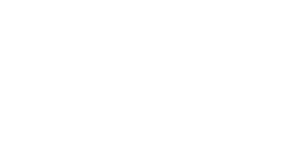

In [68]:
diffbar_online_28, bin_edges_online_28 = np.histogram(online_rms_eventduration_28, range(-20,200))
plt.figure()
plt.bar(bin_edges_online_28[:-1],diffbar_online_28)
plt.show()

<IPython.core.display.Javascript object>


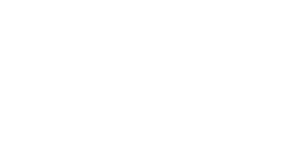

In [69]:
diffbar_online_channelavg, bin_edges_online_channelavg = np.histogram(online_rms_eventduration_channelavg, range(-20,200))
plt.figure()
plt.bar(bin_edges_online_channelavg[:-1],diffbar_online_channelavg)
plt.show()

<IPython.core.display.Javascript object>


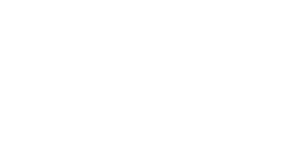

In [70]:
# Data from channel 28
%matplotlib notebook
plt.figure()
plt.plot(time_data,lfp_data_28,color='k')
#plt.plot(time_data,ripple_lfp_data,color='b')
plt.scatter(online_rms_deblipped_28,np.array([True]*len(online_rms_deblipped_28))*5000,color='r')
plt.show()

<IPython.core.display.Javascript object>


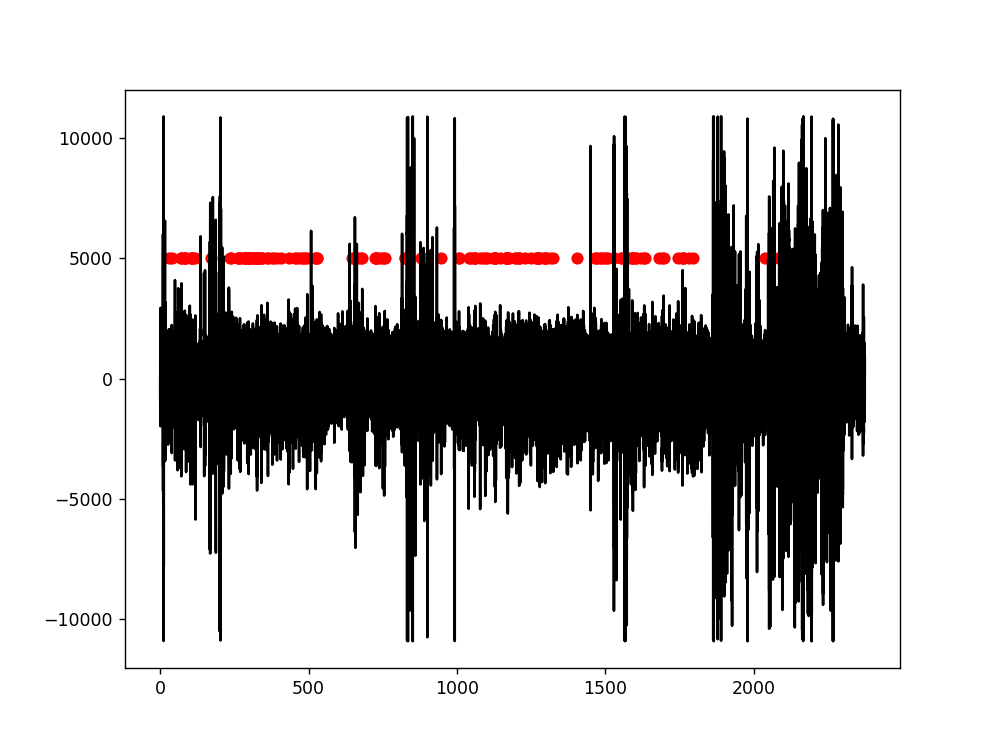

In [71]:
# Data from three channels averaged
%matplotlib notebook
plt.figure()
plt.plot(time_data,lfp_data_channelavg,color='k')
#plt.plot(time_data,ripple_lfp_data,color='b')
plt.scatter(online_rms_deblipped_channelavg,np.array([True]*len(online_rms_deblipped_channelavg))*5000,color='r')
plt.show()

# 6 Accuracy and Precision

## 6.1 Online(RMS) vs. Offline(Hilbert)

In [84]:
offline_hilbert_ap_results_28 = ct.accuracy_precision_calculation(online_rms_deblipped_28, offline_hilbert_deblipped_28, 0.03)
offline_hilbert_accuracy_28 = offline_hilbert_ap_results_28[0]
offline_hilbert_precision_28 = offline_hilbert_ap_results_28[1]
offline_hilbert_missed_28 = offline_hilbert_ap_results_28[2]

In [85]:
offline_hilbert_ap_results_channelavg = ct.accuracy_precision_calculation(online_rms_deblipped_channelavg,\
                                                                          offline_hilbert_deblipped_channelavg, 0.03)
offline_hilbert_accuracy_channelavg = offline_hilbert_ap_results_channelavg[0]
offline_hilbert_precision_channelavg = offline_hilbert_ap_results_channelavg[1]
offline_hilbert_missed_channelavg = offline_hilbert_ap_results_channelavg[2]

## 6.2 Online(RMS) vs. Offline(Hilbert)_raw

In [86]:
offline_hilbert_ap_results_28_raw = ct.accuracy_precision_calculation(online_rms_deblipped_28,\
                                                                   offline_hilbert_deblipped_28_raw, 0.03)
offline_hilbert_accuracy_28_raw = offline_hilbert_ap_results_28_raw[0]
offline_hilbert_precision_28_raw = offline_hilbert_ap_results_28_raw[1]
offline_hilbert_missed_28_raw = offline_hilbert_ap_results_28_raw[2]

## 6.3 Online(RMS) vs. Offline(RMS)

In [87]:
offline_rms_ap_results_28 = ct.accuracy_precision_calculation(online_rms_deblipped_28, offline_rms_deblipped_28, 0.03)
offline_rms_accuracy_28 = offline_rms_ap_results_28[0]
offline_rms_precision_28 = offline_rms_ap_results_28[1]
offline_rms_missed_28 = offline_rms_ap_results_28[2]

In [88]:
offline_rms_ap_results_channelavg = ct.accuracy_precision_calculation(online_rms_deblipped_channelavg,\
                                                                   offline_rms_deblipped_channelavg, 0.03)
offline_rms_accuracy_channelavg = offline_rms_ap_results_channelavg[0]
offline_rms_precision_channelavg = offline_rms_ap_results_channelavg[1]
offline_rms_missed_channelavg = offline_rms_ap_results_channelavg[2]

## 6.4 Overall Results

<IPython.core.display.Javascript object>


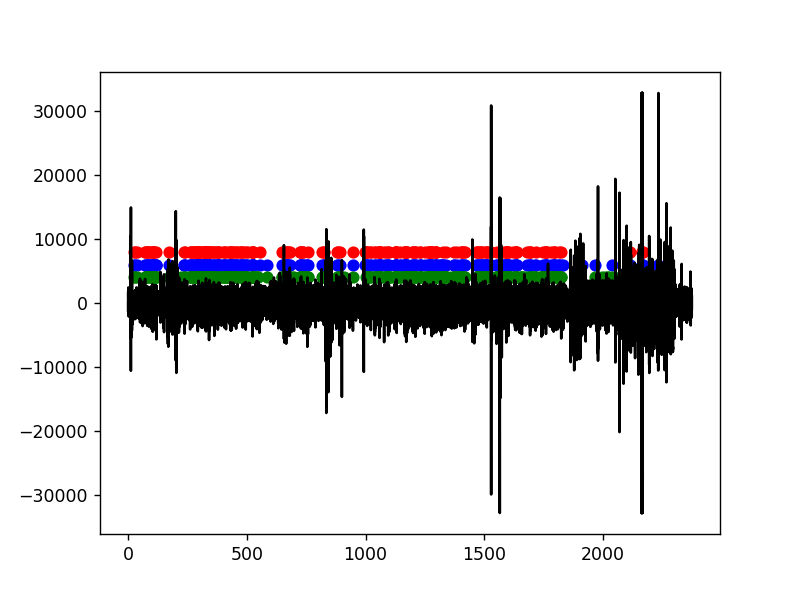

In [89]:
# Data from channel 28
plt.figure()
plt.plot(time_data,lfp_data_28,color='k')
plt.scatter(online_rms_deblipped_28,np.array([True]*len(online_rms_deblipped_28))*8000,color='r')
plt.scatter(offline_rms_deblipped_28,np.array([True]*len(offline_rms_deblipped_28))*6000,color='b')
plt.scatter(offline_hilbert_deblipped_28,np.array([True]*len(offline_hilbert_deblipped_28))*4000,color='g')

<IPython.core.display.Javascript object>


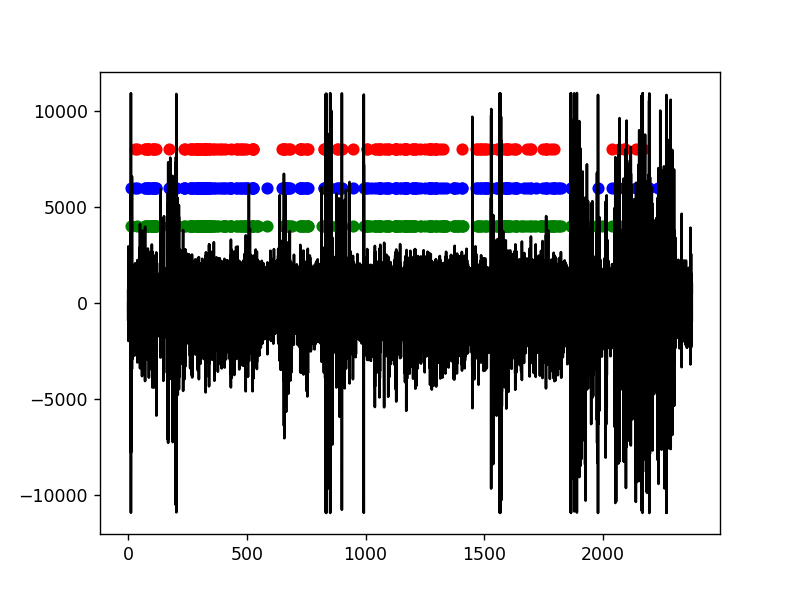

In [90]:
# Data from three channels averaged
plt.figure()
plt.plot(time_data,lfp_data_channelavg,color='k')
plt.scatter(online_rms_deblipped_channelavg,np.array([True]*len(online_rms_deblipped_channelavg))*8000,color='r')
plt.scatter(offline_rms_deblipped_channelavg,np.array([True]*len(offline_rms_deblipped_channelavg))*6000,color='b')
plt.scatter(offline_hilbert_deblipped_channelavg,np.array([True]*len(offline_hilbert_deblipped_channelavg))*4000,color='g')

<IPython.core.display.Javascript object>


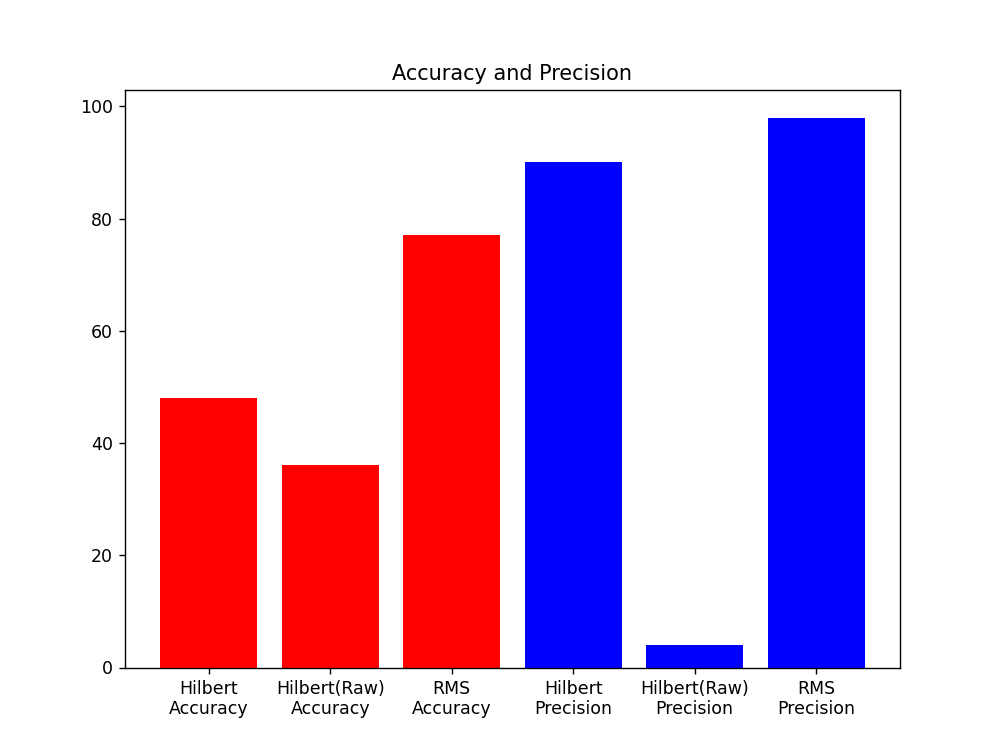

In [91]:
# Data from channel 28
x_data = ['Hilbert\nAccuracy','Hilbert(Raw)\nAccuracy','RMS\nAccuracy',
          'Hilbert\nPrecision','Hilbert(Raw)\nPrecision','RMS\nPrecision']
y_data = [round(offline_hilbert_accuracy_28),round(offline_hilbert_accuracy_28_raw),round(offline_rms_accuracy_28),
       round(offline_hilbert_precision_28),round(offline_hilbert_precision_28_raw),round(offline_rms_precision_28)]

plt.figure()
plt.bar(x_data,
       y_data,
       color=['r','r','r','b','b','b'])
'''
for x_label, y_label, label in zip(x_label, y_data,y_data):
    plt.text(x_label,
             y_label,
             label,
             ha='center', 
             va='bottom')
'''
plt.title('Accuracy and Precision')
plt.show()

<IPython.core.display.Javascript object>


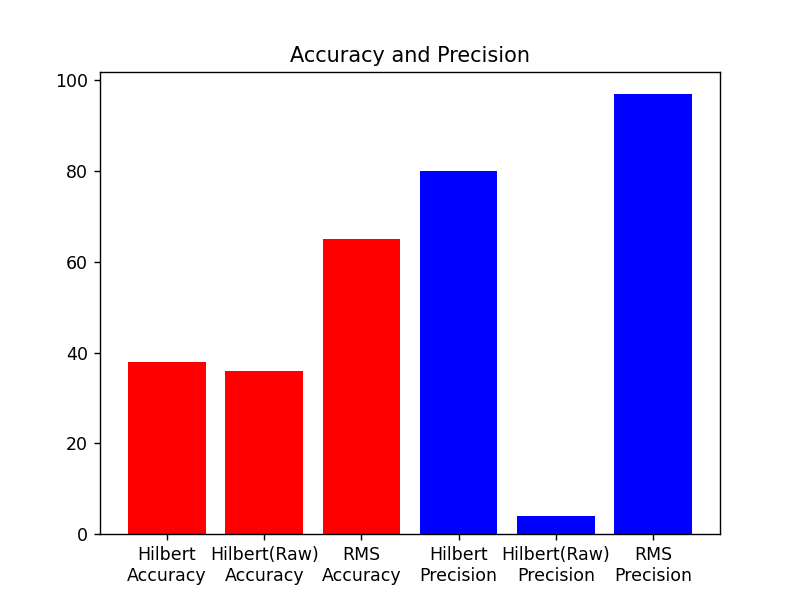

In [93]:
# Data from three channels averaged
x_data = ['Hilbert\nAccuracy','Hilbert(Raw)\nAccuracy','RMS\nAccuracy',
          'Hilbert\nPrecision','Hilbert(Raw)\nPrecision','RMS\nPrecision']
y_data = [round(offline_hilbert_accuracy_channelavg),round(offline_hilbert_accuracy_28_raw),
          round(offline_rms_accuracy_channelavg),round(offline_hilbert_precision_channelavg),
          round(offline_hilbert_precision_28_raw),round(offline_rms_precision_channelavg)]

plt.figure()
plt.bar(x_data,
       y_data,
       color=['r','r','r','b','b','b'])
'''
for x_label, y_label, label in zip(x_label, y_data,y_data):
    plt.text(x_label,
             y_label,
             label,
             ha='center', 
             va='bottom')
'''
plt.title('Accuracy and Precision')
plt.show()

In [96]:
print('offline_hilbert_numstd = '+str(offline_hilbert_numstd))
#print('noise_hilbert_numstd = '+str(noise_hilbert_numstd))
print('offline_rms_numstd = '+str(offline_rms_numstd))
print('online_rms_numstd = '+str(online_rms_numstd))
print('# of events with Offline(Hilbert)_denoised: '+str(len(offline_hilbert_truetime_28)))
print('# of events with Offline(Hilbert)_denoised_deblipped: '+str(len(offline_hilbert_deblipped_28)))
print('# of events with Offline(Hilbert)_raw: '+str(len(offline_hilbert_truetime_28_raw)))
print('# of events with Offline(Hilbert)_raw_deblipped: '+str(len(offline_hilbert_deblipped_28_raw)))
print('# of events with Offline(RMS): '+str(len(offline_rms_truetime_28)))
print('# of events with Offline(RMS)_deblipped: '+str(len(offline_rms_deblipped_28)))
print('# of events with Online(RMS): '+str(len(online_rms_truetime_28)))
print('# of events with Online(RMS)_deblipped: '+str(len(online_rms_deblipped_28)))
print('------------')
print('Accuracy with Offline(Hilbert): '+str(offline_hilbert_accuracy_28))
print('Precision with Offline(Hilbert): '+str(offline_hilbert_precision_28))
print('Accuracy with Offline(Hilbert)_raw: '+str(offline_hilbert_accuracy_28_raw))
print('Precision with Offline(Hilbert)_raw: '+str(offline_hilbert_precision_28_raw))
print('Accuracy with Offline(RMS): '+str(offline_rms_accuracy_28))
print('Precision with Offline(RMS): '+str(offline_rms_precision_28))

offline_hilbert_numstd = 9
offline_rms_numstd = 3
online_rms_numstd = 3
# of events with Offline(Hilbert)_denoised: 531
# of events with Offline(Hilbert)_denoised_deblipped: 404
# of events with Offline(Hilbert)_raw: 67
# of events with Offline(Hilbert)_raw_deblipped: 25
# of events with Offline(RMS): 605
# of events with Offline(RMS)_deblipped: 273
# of events with Online(RMS): 859
# of events with Online(RMS)_deblipped: 214
------------
Accuracy with Offline(Hilbert): 47.524752475247524
Precision with Offline(Hilbert): 89.7196261682243
Accuracy with Offline(Hilbert)_raw: 36.0
Precision with Offline(Hilbert)_raw: 4.205607476635514
Accuracy with Offline(RMS): 76.55677655677655
Precision with Offline(RMS): 97.66355140186917


In [112]:
print('offline_hilbert_numstd = '+str(offline_hilbert_numstd))
print('offline_rms_numstd = '+str(offline_rms_numstd))
print('online_rms_numstd = '+str(online_rms_numstd))
print('# of events with Offline(Hilbert)_denoised: '+str(len(offline_hilbert_truetime_channelavg)))
print('# of events with Offline(Hilbert)_denoised_deblipped: '+str(len(offline_hilbert_deblipped_channelavg)))
print('# of events with Offline(RMS): '+str(len(offline_rms_truetime_channelavg)))
print('# of events with Offline(RMS)_deblipped: '+str(len(offline_rms_deblipped_channelavg)))
print('# of events with Online(RMS): '+str(len(online_rms_truetime_channelavg)))
print('# of events with Online(RMS)_deblipped: '+str(len(online_rms_deblipped_channelavg)))
print('------------')
print('Accuracy with Offline(Hilbert): '+str(offline_hilbert_accuracy_channelavg))
print('Precision with Offline(Hilbert): '+str(offline_hilbert_precision_channelavg))
print('Accuracy with Offline(RMS): '+str(offline_rms_accuracy_channelavg))
print('Precision with Offline(RMS): '+str(offline_rms_precision_channelavg))

offline_hilbert_numstd = 9
offline_rms_numstd = 3
online_rms_numstd = 3
# of events with Offline(Hilbert)_denoised: 430
# of events with Offline(Hilbert)_denoised_deblipped: 352
# of events with Offline(RMS): 604
# of events with Offline(RMS)_deblipped: 249
# of events with Online(RMS): 901
# of events with Online(RMS)_deblipped: 167
------------
Accuracy with Offline(Hilbert): 38.06818181818182
Precision with Offline(Hilbert): 80.23952095808383
Accuracy with Offline(RMS): 65.06024096385542
Precision with Offline(RMS): 97.0059880239521


# 7 Lag Calculation

## 7.1 Cross Correlation - Offline(Hilbert) and Online(RMS)

In [99]:
offline_hilbert_onlags_28 = ct.lag_distribution(online_rms_truetime_28,offline_hilbert_truetime_28)

In [100]:
offline_hilbert_onlags_channelavg = ct.lag_distribution(online_rms_truetime_channelavg,offline_hilbert_truetime_channelavg)

<IPython.core.display.Javascript object>


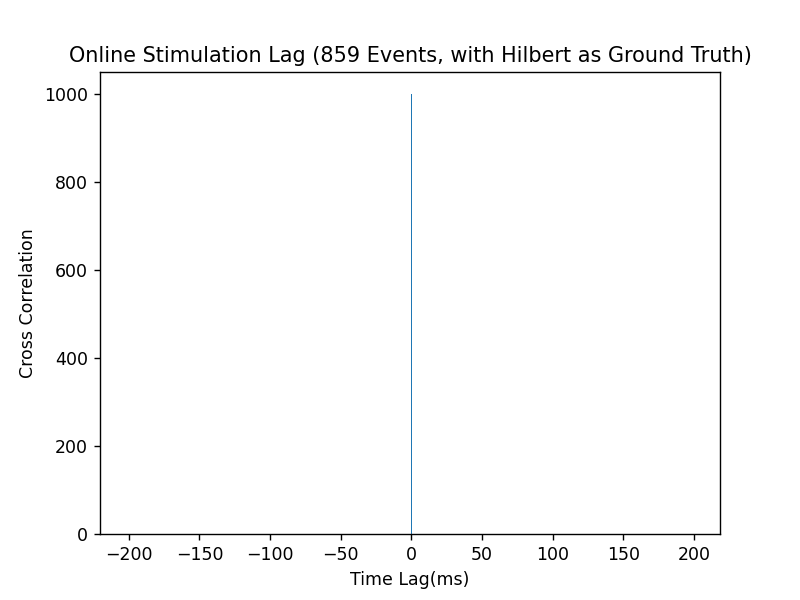

Text(0.5, 1.0, 'Online Stimulation Lag (859 Events, with Hilbert as Ground Truth)')

In [101]:
# Data from channel 28
offline_hilbert_xcorrhist_28, offline_hilbert_binedges_28 = np.histogram(offline_hilbert_onlags_28,range(-200,200))
plt.figure()
plt.bar(offline_hilbert_binedges_28[:-1],offline_hilbert_xcorrhist_28)
plt.xlabel('Time Lag(ms)')
plt.ylabel('Cross Correlation')
plt.title('Online Stimulation Lag (%d Events, with Hilbert as Ground Truth)'%len(online_rms_truetime_28))

<IPython.core.display.Javascript object>


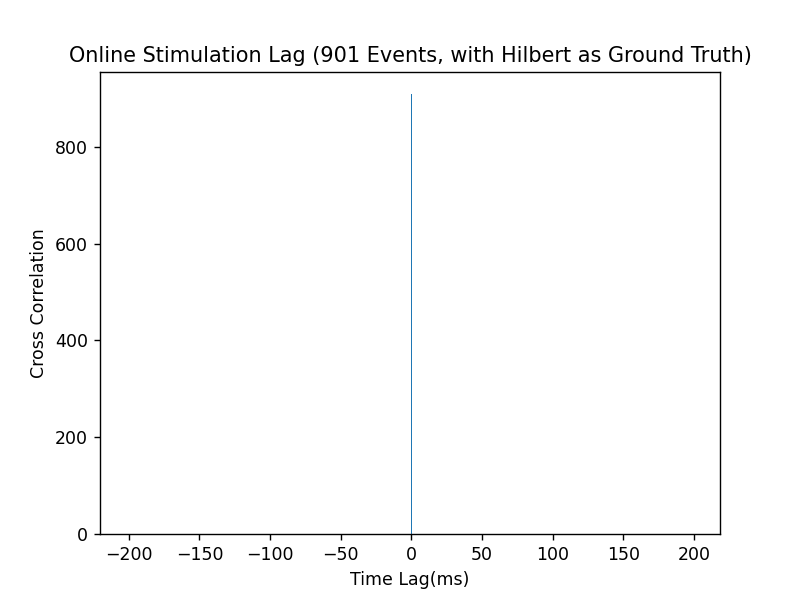

Text(0.5, 1.0, 'Online Stimulation Lag (901 Events, with Hilbert as Ground Truth)')

In [102]:
# Data from channel 28
offline_hilbert_xcorrhist_channelavg, offline_hilbert_binedges_channelavg = np.histogram(offline_hilbert_onlags_channelavg,\
                                                                                         range(-200,200))
plt.figure()
plt.bar(offline_hilbert_binedges_channelavg[:-1],offline_hilbert_xcorrhist_channelavg)
plt.xlabel('Time Lag(ms)')
plt.ylabel('Cross Correlation')
plt.title('Online Stimulation Lag (%d Events, with Hilbert as Ground Truth)'%len(online_rms_truetime_channelavg))

## 7.2 Cross Correlation - Offline(Hilbert)_raw and Online(RMS)

In [ ]:
offline_hilbert_onlags_28_raw = ct.lag_distribution(online_rms_truetime_28,offline_hilbert_truetime_28_raw)

In [ ]:
offline_hilbert_onlags_channelavg_raw = ct.lag_distribution(online_rms_truetime_channelavg,\
                                                            offline_hilbert_truetime_channelavg_raw)

In [ ]:
offline_hilbert_xcorrhist_28_raw, offline_hilbert_binedges_28vg_raw = np.histogram(offline_hilbert_onlags_28_raw,\
                                                                                                 range(-200,200))
plt.figure()
plt.bar(offline_hilbert_binedges_28_raw[:-1],offline_hilbert_xcorrhist_28_raw)
plt.xlabel('Time Lag(ms)')
plt.ylabel('Cross Correlation')
plt.title('Online Stimulation Lag (%d Events, with Hilbert(Raw) as Ground Truth)'%len(online_rms_truetime_28))

In [ ]:
offline_hilbert_xcorrhist_channelavg_raw, offline_hilbert_binedges_channelavg_raw = np.histogram(offline_hilbert_onlags_channelavg_raw,\
                                                                                                 range(-200,200))
plt.figure()
plt.bar(offline_hilbert_binedges_channelavg_raw[:-1],offline_hilbert_xcorrhist_channelavg_raw)
plt.xlabel('Time Lag(ms)')
plt.ylabel('Cross Correlation')
plt.title('Online Stimulation Lag (%d Events, with Hilbert(Raw) as Ground Truth)'%len(online_rms_truetime_channelavg))

## 7.3 Cross Correlation - Offline(RMS) and Online(RMS)

In [ ]:
offline_rms_onlags_28 = ct.lag_distribution(online_rms_truetime_28,offline_rms_truetime_28)

In [ ]:
offline_rms_onlags_channelavg = ct.lag_distribution(online_rms_truetime_channelavg,offline_rms_truetime_channelavg)

In [ ]:
offline_rms_xcorrhist_28, offline_rms_binedges_28 = np.histogram(offline_rms_onlags_28,\
                                                                                 range(-150,150))
plt.figure()
plt.bar(offline_rms_binedges_28[:-1],offline_rms_xcorrhist_28)
plt.xlabel('Time Lag(ms)')
plt.ylabel('Cross Correlation')
plt.title('Online Stimulation Lag (%d Events, with RMS as Ground Truth)'%len(online_rms_truetime_28))

In [ ]:
offline_rms_xcorrhist_channelavg, offline_rms_binedges_channelavg = np.histogram(offline_rms_onlags_channelavg,\
                                                                                 range(-150,150))
plt.figure()
plt.bar(offline_rms_binedges_channelavg[:-1],offline_rms_xcorrhist_channelavg)
plt.xlabel('Time Lag(ms)')
plt.ylabel('Cross Correlation')
plt.title('Online Stimulation Lag (%d Events, with RMS as Ground Truth)'%len(online_rms_truetime_channelavg))

# 8 Hyperparameter Sensitivity test

In [103]:
accuracy_matrix_28 = np.zeros((8,8),dtype=float)
precision_matrix_28 = np.zeros((8,8),dtype=float)
miss_matrix_28 = np.zeros((8,8),dtype=float)

for i in range(1,9):
    rms_stimarr_28 = ct.detect(online_rms_magnitude_28,i,3)
    rms_events_28 = ct.extract_events(rms_stimarr_28,online_rms_time_28)
    rms_deblipped_28 = ct.deblip_with_duration(rms_events_28[2],rms_events_28[1],50)
    for j in range(5,13):
        hilbert_stimarr_28 = ct.detect(offline_hilbert_denoised_28,j,3)
        hilbert_events_28 = ct.extract_events(hilbert_stimarr_28,offline_hilbert_time_28)
        hilbert_deblipped_28 = ct.deblip_with_frequency(hilbert_events_28[2],0.1)
        accuracy_precision_results_28 = ct.accuracy_precision_calculation(rms_deblipped_28, hilbert_deblipped_28, 0.03)
        
        accuracy_matrix_28[i-1,j-5] = accuracy_precision_results_28[0]
        precision_matrix_28[i-1,j-5] = accuracy_precision_results_28[1]
        miss_matrix_28[i-1,j-5] = accuracy_precision_results_28[2]

In [105]:
accuracy_matrix_channelavg = np.zeros((8,8),dtype=float)
precision_matrix_channelavg = np.zeros((8,8),dtype=float)
miss_matrix_channelavg = np.zeros((8,8),dtype=float)

for i in range(1,9):
    rms_stimarr_channelavg = ct.detect(online_rms_magnitude_channelavg,i,3)
    rms_events_channelavg = ct.extract_events(rms_stimarr_channelavg,online_rms_time_channelavg)
    rms_deblipped_channelavg = ct.deblip_with_duration(rms_events_channelavg[2],rms_events_channelavg[1],50)
    for j in range(5,13):
        hilbert_stimarr_channelavg = ct.detect(offline_hilbert_denoised_channelavg,j,3)
        hilbert_events_channelavg = ct.extract_events(hilbert_stimarr_channelavg,offline_hilbert_time_channelavg)
        hilbert_deblipped_channelavg = ct.deblip_with_frequency(hilbert_events_channelavg[2],0.1)
        accuracy_precision_results_channelavg = ct.accuracy_precision_calculation(rms_deblipped_channelavg,\
                                                                                  hilbert_deblipped_channelavg, 0.03)
        
        accuracy_matrix_channelavg[i-1,j-5] = accuracy_precision_results_channelavg[0]
        precision_matrix_channelavg[i-1,j-5] = accuracy_precision_results_channelavg[1]
        miss_matrix_channelavg[i-1,j-5] = accuracy_precision_results_channelavg[2]

<IPython.core.display.Javascript object>


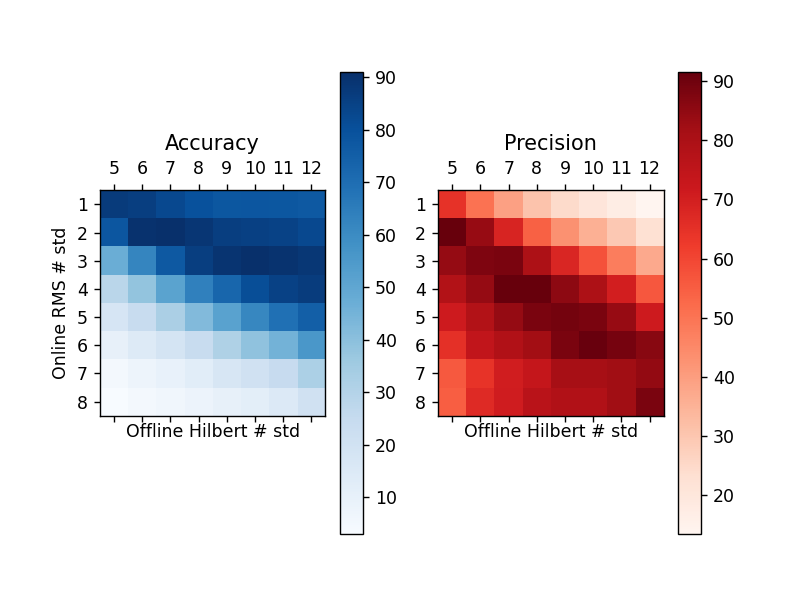

In [106]:
# Data from channel 28
%matplotlib notebook
fig,(ax1,ax2) = plt.subplots(1,2)

ax_ylabels = []
ax_xlabels = []
for i in range(1,9):
    ax_ylabels.append(str(i))
    ax_xlabels.append(str(i+4))
    
ax1_mat = ax1.matshow(accuracy_matrix_28, cmap=plt.cm.Blues)  
ax1.set_yticks(np.linspace(0,7,8))
ax1.set_yticklabels(ax_ylabels)
ax1.set_xticks(np.linspace(0,7,8))
ax1.set_xticklabels(ax_xlabels)
ax1.set_xlabel('Offline Hilbert # std')
ax1.set_ylabel('Online RMS # std')
ax1.set_title('Accuracy')

ax2_mat = ax2.matshow(precision_matrix_28, cmap=plt.cm.Reds)
ax2.set_yticks(np.linspace(0,7,8)) 
ax2.set_yticklabels(ax_ylabels)
ax2.set_xticks(np.linspace(0,7,8))
ax2.set_xticklabels(ax_xlabels)
ax2.set_xlabel('Offline Hilbert # std')
ax2.set_title('Precision')

fig.colorbar(ax1_mat,ax=ax1)
fig.colorbar(ax2_mat,ax=ax2)

<IPython.core.display.Javascript object>


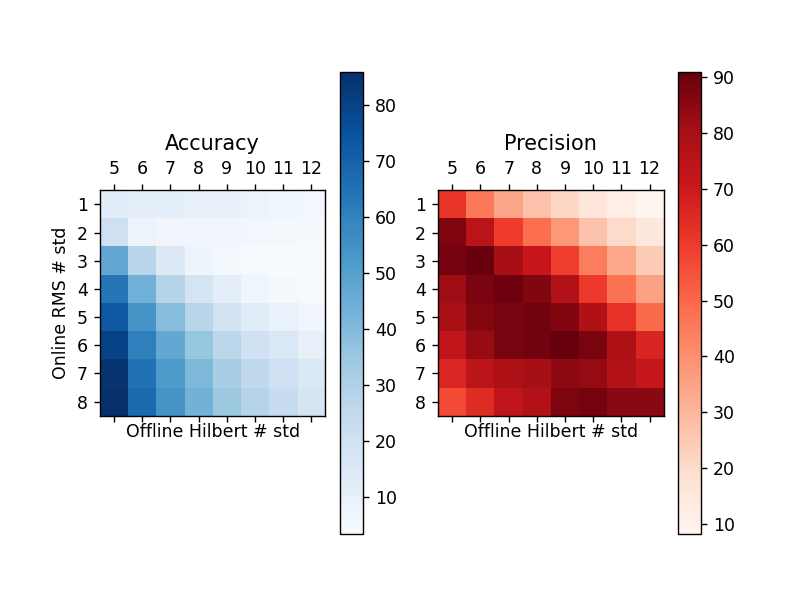

In [107]:
# Data from channel 28
%matplotlib notebook
fig,(ax3,ax4) = plt.subplots(1,2)
    
ax3_mat = ax3.matshow(accuracy_matrix_channelavg, cmap=plt.cm.Blues)  
ax3.set_yticks(np.linspace(0,7,8))
ax3.set_yticklabels(ax_ylabels)
ax3.set_xticks(np.linspace(0,7,8))
ax3.set_xticklabels(ax_xlabels)
ax3.set_xlabel('Offline Hilbert # std')
ax3.set_ylabel('Online RMS # std')
ax3.set_title('Accuracy')

ax4_mat = ax4.matshow(precision_matrix_channelavg, cmap=plt.cm.Reds)
ax4.set_yticks(np.linspace(0,7,8)) 
ax4.set_yticklabels(ax_ylabels)
ax4.set_xticks(np.linspace(0,7,8))
ax4.set_xticklabels(ax_xlabels)
ax4.set_xlabel('Offline Hilbert # std')
ax4.set_title('Precision')

fig.colorbar(ax3_mat,ax=ax3)
fig.colorbar(ax4_mat,ax=ax4)

<IPython.core.display.Javascript object>


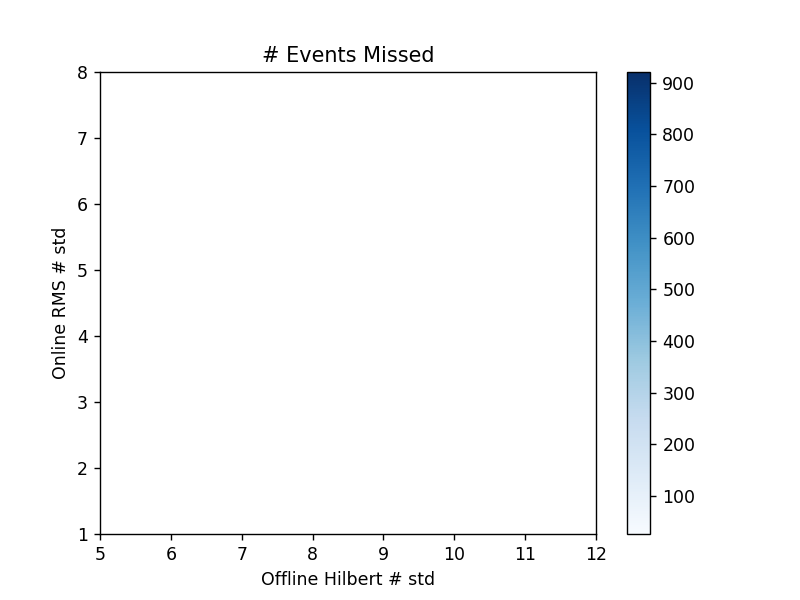

In [111]:
# Data from channel 28
fig,ax5 = plt.subplots()
    
ax5_mat = ax3.matshow(miss_matrix_28, cmap=plt.cm.Blues)  
ax5.set_yticks(np.linspace(0,7,8))
ax5.set_yticklabels(ax_ylabels)
ax5.set_xticks(np.linspace(0,7,8))
ax5.set_xticklabels(ax_xlabels)
ax5.set_xlabel('Offline Hilbert # std')
ax5.set_ylabel('Online RMS # std')
ax5.set_title('# Events Missed')

fig.colorbar(ax5_mat,ax=ax5)

<IPython.core.display.Javascript object>


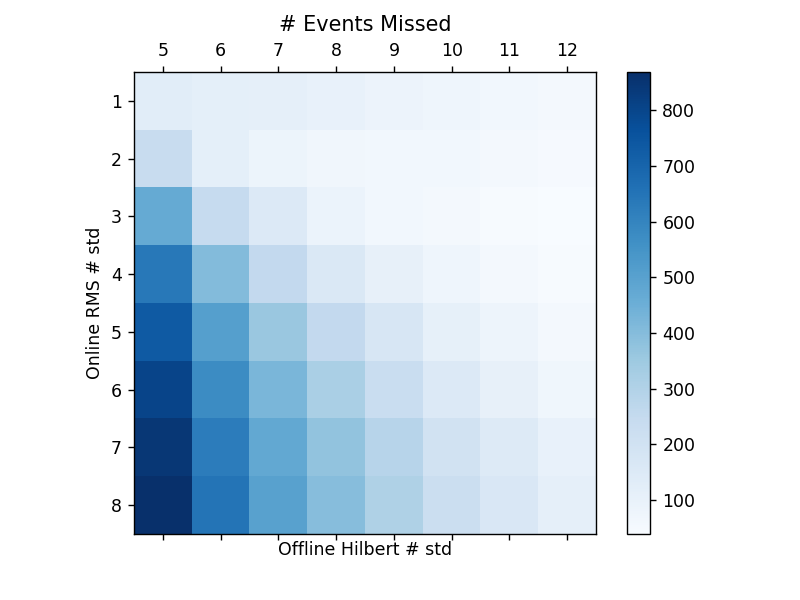

In [110]:
# Data from channel 28
fig,ax6 = plt.subplots()
    
ax6_mat = ax6.matshow(miss_matrix_channelavg, cmap=plt.cm.Blues)  
ax6.set_yticks(np.linspace(0,7,8))
ax6.set_yticklabels(ax_ylabels)
ax6.set_xticks(np.linspace(0,7,8))
ax6.set_xticklabels(ax_xlabels)
ax6.set_xlabel('Offline Hilbert # std')
ax6.set_ylabel('Online RMS # std')
ax6.set_title('# Events Missed')

fig.colorbar(ax6_mat,ax=ax6)